<a href="https://colab.research.google.com/github/eliassalazarb/FisicaComputacional1/blob/main/Actividad9/Actividad9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos bibliotecas
import numpy as np
from scipy import integrate, linalg
import pylab as pl
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.integrate import odeint, solve_ivp
from numpy.linalg import matrix_power as mpow
from mpl_toolkits import mplot3d

#**Ejercicio 1**

In [2]:
#Definimos la matriz y obtenemos los eigenvalores y eigenvectores.
A1=np.array([[0,1],[-1,0]])
eigval, eigvec = la.eig(A1)
print('Eigenvalores')
print('λ1: ', eigval[0])
print('λ2: ', eigval[1])
print('Eigenvectores')
print('v1: ', eigvec[0])
print('v2: ', eigvec[1])

Eigenvalores
λ1:  1j
λ2:  -1j
Eigenvectores
v1:  [0.70710678+0.j 0.70710678-0.j]
v2:  [0.+0.70710678j 0.-0.70710678j]


Esto significa que tenemos el caso $\lambda_{1,2}=a\pm ib$, y vemos que $a=0$ y $b=1$. De esto concluímos que tenemos el caso de un centro.

In [3]:
#Obtenemos el punto crítico igualando las derivadas a 0 y resolviendo el sistema
M=np.zeros((2,1))
V_crit1=la.solve(A1,M)
print('Punto crítico: ', V_crit1)


Punto crítico:  [[-0.]
 [ 0.]]


Las soluciones en este caso toman la forma

Al desarrollar escogiendo los eigenvectores adecuados tenemos:

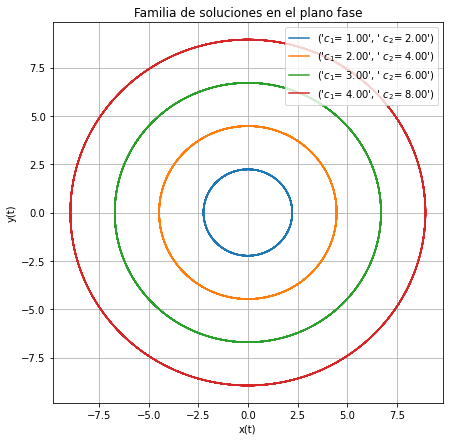

In [4]:
#Función de la solución del sistema.
def solf1(t,c1,c2):
  t0=np.zeros((1000,))
  t0=t
  sol=[c1*np.cos(t0)+c2*np.sin(t0),-c1*np.sin(t0)+c2*np.cos(t0)]
  return sol

#Creamos suficientes puntos en el tiempo t y constantes arbitrarias c1 y c2
t=np.linspace(0,50,1000)
c1=[1,2,3,4]
c2=[2,4,6,8]

#Graficamos las soluciones haciendo variar a las constantes arbitrarias
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=solf1(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Familia de soluciones en el plano fase')
plt.legend(loc='best')
plt.grid()
plt.show()

#**Ejercicio 2**

In [5]:
#Definimos la matriz y obtenemos los eigenvalores y eigenvectores.
A2=np.array([[0,1],[1,0]])
eigval, eigvec = la.eig(A2)
print('Eigenvalores')
print('λ1: ', eigval[0])
print('λ2: ', eigval[1])
print('Eigenvectores')
print('v1: ', eigvec[0])
print('v2: ', eigvec[1])

Eigenvalores
λ1:  (1+0j)
λ2:  (-1+0j)
Eigenvectores
v1:  [ 0.70710678 -0.70710678]
v2:  [0.70710678 0.70710678]


Tenemos $\lambda_1=1$ y $\lambda_2=-1$, lo cual significa que tenemos un punto de silla.

In [6]:
#Obtenemos el punto crítico igualando las derivadas a 0 y resolviendo el sistema
M=np.zeros((2,1))
V_crit2=la.solve(A2,M)
print('Punto crítico: ', V_crit2)

Punto crítico:  [[0.]
 [0.]]


Al desarrollar utilizando los eigenvectores adecuados tenemos:

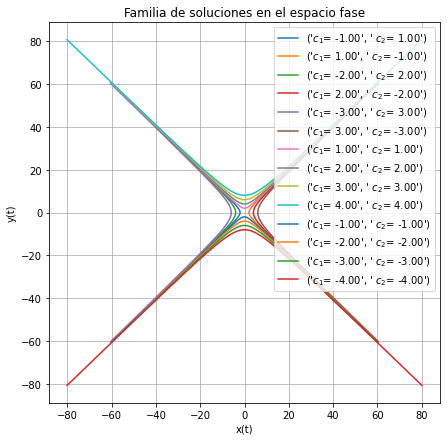

In [7]:
def solf2(t,c1,c2):
  sol=[c1*np.exp(t)-c2*np.exp(-t), c1*np.exp(t)+c2*np.exp(-t)]
  return sol

#Definimos el intervalo de tiempo y las constantes arbitrarias
t=np.linspace(-3,3,500)
c1=[-1,1,-2,2,-3,3,1,2,3,4,-1,-2,-3,-4]
c2=[1,-1,2,-2,3,-3,1,2,3,4,-1,-2,-3,-4]

# Graficamos el espacio fase de las soluciones
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=solf2(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Familia de soluciones en el espacio fase')
plt.legend(loc='best')
plt.grid()
plt.show()

#**Ejercicio 3**

In [8]:
#Definimos el valor de la frecuencia natural
w0 = 5
#Definimos la matriz y obtenemos los eigenvalores y eigenvectores.
A3=np.array([[0,1],[-w0**2,0]])
eigval, eigvec = la.eig(A3)
print('Eigenvalores')
print('λ1: ', eigval[0])
print('λ2: ', eigval[1])
print('Eigenvectores')
print('v1: ', eigvec[0])
print('v2: ', eigvec[1])

Eigenvalores
λ1:  5j
λ2:  -5j
Eigenvectores
v1:  [0.-0.19611614j 0.+0.19611614j]
v2:  [0.98058068+0.j 0.98058068-0.j]


Esto significa que tenemos el caso $\lambda_{1,2}=a\pm ib$, y vemos que $a=0$ y $b=5$ (Vemos que el valor de b corresponde a la frecuencia natural del oscilador). De esto concluímos que tenemos el caso de un centro.

In [9]:
#Obtenemos el punto crítico igualando las derivadas a 0 y resolviendo el sistema
M=np.zeros((2,1))
V_crit3=la.solve(A3,M)
print('Punto crítico: ', V_crit3)

Punto crítico:  [[-0.]
 [ 0.]]


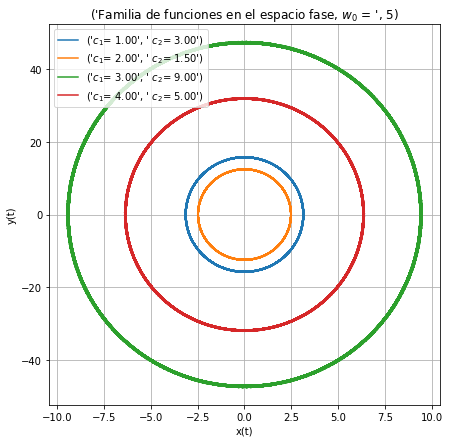

In [10]:
def solf3(t,w0,c1,c2):
  sol=[c1*np.cos(w0*t)+c2*np.sin(w0*t),-c1*w0*np.sin(w0*t)+c2*w0*np.cos(w0*t)]
  return sol

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase
t=np.linspace(-10,50,1000)
c1=[1,2,3,4]
c2=[3,1.5,9,5]

# Graficamos el espacio fase de las soluciones
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=solf3(t,w0,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(('Familia de funciones en el espacio fase, $w_0$ = ',w0))
plt.legend(loc='best')
plt.grid()
plt.show()

#**Ejercicio 4**

In [11]:
#Definimos la matriz y obtenemos los eigenvalores y eigenvectores.
A4=np.array([[-2,0,0],[0,0,2],[0,-2,0]])
eigval, eigvec = la.eig(A4)
print('Eigenvalores')
print('λ1: ', eigval[0])
print('λ2: ', eigval[1])
print('λ3: ', eigval[2])
print('Eigenvectores')
print('v1: ', eigvec[0])
print('v2: ', eigvec[1])
print('v3: ', eigvec[2])

Eigenvalores
λ1:  2.0000000000000004j
λ2:  -2.0000000000000004j
λ3:  (-2+0j)
Eigenvectores
v1:  [0.+0.j 0.-0.j 1.+0.j]
v2:  [-0.70710678+0.j -0.70710678-0.j  0.        +0.j]
v3:  [0.-0.70710678j 0.+0.70710678j 0.+0.j        ]


Vemos que $\lambda_1=2i$, $\lambda_2=-2i$, $\lambda_3=-2$. Tenemos dos eigenvalores complejos y uno real negativo. Esto es debido a que la primera ecuación no está acoplada, lo cual significa que la estabilidad del sistema depende de las otras dos ecuaciones.

In [12]:
#Obtenemos el punto crítico igualando las derivadas a 0 y resolviendo el sistema
M=np.zeros((3,1))
V_crit4=la.solve(A4,M)
print('Punto crítico: ', V_crit4)

Punto crítico:  [[-0.]
 [-0.]
 [ 0.]]


No handles with labels found to put in legend.


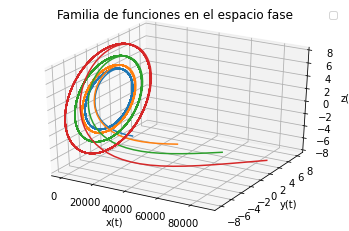

In [13]:
# Definimos la función con la solución del sistema, como se ve arriba
def solf4(t,c1,c2,c3):
  sol=[c1*np.exp(-2*t), c2*np.cos(2*t)+c3*np.sin(2*t), -c2*np.sin(2*t)+c3*np.cos(2*t)]
  return sol

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase 3D
t=np.linspace(-5,50,1000)
c1=[1,2,3,4]
c2=[4,3,2,1]
c3=[2,4,6,8]

# Graficamos el espacio fase 3D de las soluciones
plt.figure()
ax=plt.axes(projection='3d')
for c,d,e in zip(c1,c2,c3):
  v=solf4(t,c,d,e)
  s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.title('Familia de funciones en el espacio fase')
plt.legend(loc='best')

plt.show()

Vemos que el punto crítico es inestable en el espacio fase. También es importante notar que si pensamos en el plano fase yz tenemos un centro, lo cual se debe a que x(t) no depende de y ni de z.

#**Ejercicio 5**

In [14]:
#Definimos la matriz y obtenemos los eigenvalores y eigenvectores.
A5=np.array([[-1,0,1],[0,3,0],[-1,0,-1]])
eigval, eigvec = la.eig(A5)
print('Eigenvalores')
print('λ1: ', eigval[0])
print('λ2: ', eigval[1])
print('λ3: ', eigval[2])
print('Eigenvectores')
print('v1: ', eigvec[0])
print('v2: ', eigvec[1])
print('v3: ', eigvec[2])

Eigenvalores
λ1:  (-1+1j)
λ2:  (-1-1j)
λ3:  (3+0j)
Eigenvectores
v1:  [0.70710678+0.j 0.70710678-0.j 0.        +0.j]
v2:  [0.+0.j 0.-0.j 1.+0.j]
v3:  [0.+0.70710678j 0.-0.70710678j 0.+0.j        ]


Vemos que $\lambda_1=-1+i$, $\lambda_2=-1-i$, $\lambda_3=3$. Tenemos dos eigenvalores complejos y uno real positivo. Esto se debe a que el movimiento en $y$ no depende de las otras variables. Tenemos entonces un foco o espiral estable ya que $a<0<b$.

In [15]:
#Obtenemos el punto crítico igualando las derivadas a 0 y resolviendo el sistema
M=np.zeros((3,1))
V_crit5=la.solve(A5,M)
print('Punto crítico: ', V_crit5)

Punto crítico:  [[-0.]
 [ 0.]
 [-0.]]


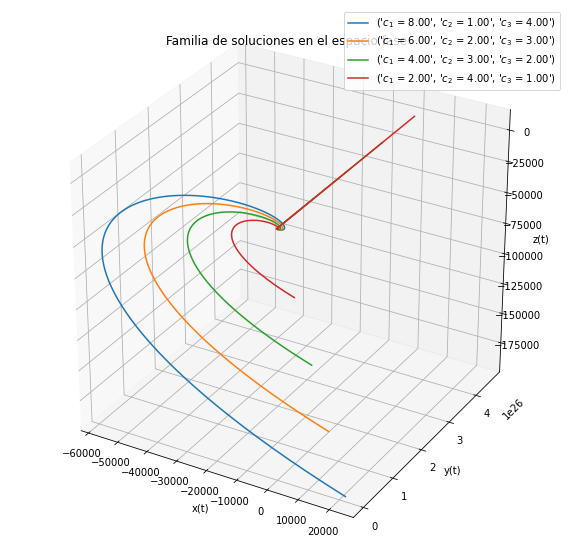

In [16]:
# Definimos la función con la solución del sistema, como se ve arriba
def solf5(t,c1,c2,c3):
  sol=[np.exp(-t)*(c1*np.sin(t)+c3*np.cos(t)),c2*np.exp(3*t) ,np.exp(-t)*(-c3*np.sin(t)+c1*np.cos(t)) ]
  return sol

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase 3D
t=np.linspace(-10,20,1000)
c1=[8,6,4,2]
c2=[1,2,3,4]
c3=[4,3,2,1]

# Graficamos el espacio fase 3D de las soluciones
fig=plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
for c,d,e in zip(c1,c2,c3):
  v=solf5(t,c,d,e)
  s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:],label=('$c_1$ = {:.2f}'.format(c),'$c_2$ = {:.2f}'.format(d),'$c_3$ = {:.2f}'.format(e)))
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.title('Familia de soluciones en el espacio fase')
ax.legend(loc='best')
plt.grid()
plt.show()

Vemos que hay un punto crítico inestable que similar a un espiral.

#**Ejercicio 6**

In [17]:
#Definimos un vector V: V[0]=x, V[1]=y
#Definimos la Matriz A 

A6 = np.array([[-1,0], [1,2]])
print('A =', 6)

def f6(V, t=1):
    return np.array([ -V[0] ,
                  V[0]+2*V[1]])
    
#Los puntos críticos del sistema
V_crit6 = np.array([ 0.,0.])

print('Punto crítico:', V_crit6)
print(' ')
#En los puntos críticos se anulan las derivadas. 
all(f6(V_crit6) == np.zeros(2) )
                                
#Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = linalg.eig(A6)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

A = 6
Punto crítico: [0. 0.]
 
Eigenvalores: [ 2.+0.j -1.+0.j]
Eigenvectores: [[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


In [18]:
#Solución
#Los eigenvectores son linealmente independientes
lambda1 = eigvals[0]
lambda2 = eigvals[1]
print('Eigenvalores')
print('λ1= ', lambda1)
print('λ2= ', lambda2)
print(' ')
print('Eigenvectores')
v1 = eigvecs[:,0]
v2 = eigvecs[:,1]
print('v1=',v1)
print('v2=',v2)

Eigenvalores
λ1=  (2+0j)
λ2=  (-1+0j)
 
Eigenvectores
v1= [0. 1.]
v2= [ 0.9486833  -0.31622777]


In [19]:
#Solución numérica. Integramos el sistema de ecuaciones de usando odeint
t = np.linspace(1, 5,  500)              # Rango de tiempo de integración
V0 = np.array([0, 3])                     # Condiciones iniciales x(1)=0, y(1)=3
B, infodict = integrate.odeint(f6, V0, t, full_output=True)
infodict['message']

'Integration successful.'

<Figure size 432x288 with 0 Axes>

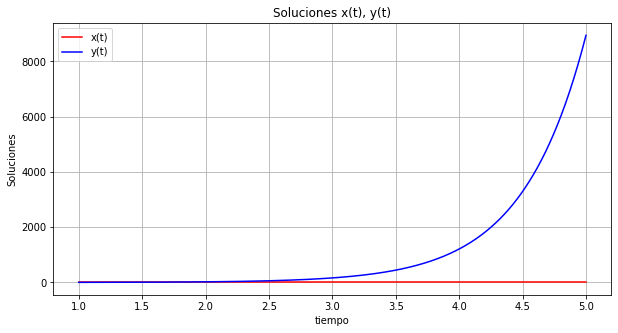

In [20]:
#Graficamos la solución
x, y = B.T

f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, x, 'r-', label='x(t)');
plt.plot(t, y  , 'b-', label='y(t)');
plt.grid();
#plt.ylim(0, 10)
plt.legend(loc='best');
plt.xlabel('tiempo');
plt.ylabel('Soluciones');
plt.title('Soluciones x(t), y(t)');
plt.show();

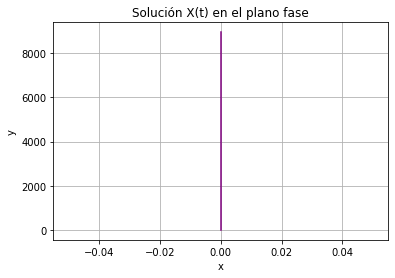

In [21]:
#Solución en el plano fase
plt.plot(x, y, 'purple')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
#plt.ylim(0, 10)
#plt.xlim(0, 10)
plt.title('Solución X(t) en el plano fase')
plt.show()

#**Ejercicio 7**

In [22]:
#Definimos un vector V: V[0]=x, V[1]=y
#Definimos la Matriz A 

A7 = np.array([[2,1], [1,1]])
print('A =', A7)

def f7(V, t=1):
    return np.array([ 2*V[0] + V[1] ,
                  V[0]+V[1]])
    
#Los puntos críticos del sistema
V_crit7 = np.array([     0. ,  0.])

print('Punto crítico:', V_crit7)
print(' ')
#En los puntos críticos se anulan las derivadas. 
all(f7(V_crit7) == np.zeros(2) )
                                
#Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = linalg.eig(A7)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

A = [[2 1]
 [1 1]]
Punto crítico: [0. 0.]
 
Eigenvalores: [2.61803399+0.j 0.38196601+0.j]
Eigenvectores: [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [23]:
#Solución
#Los eigenvectores son linealmente independientes
lambda1 = eigvals[0]
lambda2 = eigvals[1]
print('Eigenvalores')
print('λ1= ', lambda1)
print('λ2= ', lambda2)
print(' ')
print('Eigenvectores')
v1 = eigvecs[:,0]
v2 = eigvecs[:,1]
print('v1=',v1)
print('v2=',v2)

Eigenvalores
λ1=  (2.618033988749895+0j)
λ2=  (0.3819660112501052+0j)
 
Eigenvectores
v1= [0.85065081 0.52573111]
v2= [-0.52573111  0.85065081]


In [24]:

#Solución numérica. Integramos el sistema de ecuaciones de usando odeint
t = np.linspace(1, 5,  500)              # Rango de tiempo de integración
V0 = np.array([1, 1])                     # Condiciones iniciales x(1)=1, y(1)=1
B, infodict = integrate.odeint(f7, V0, t, full_output=True)
infodict['message']

'Integration successful.'

<Figure size 432x288 with 0 Axes>

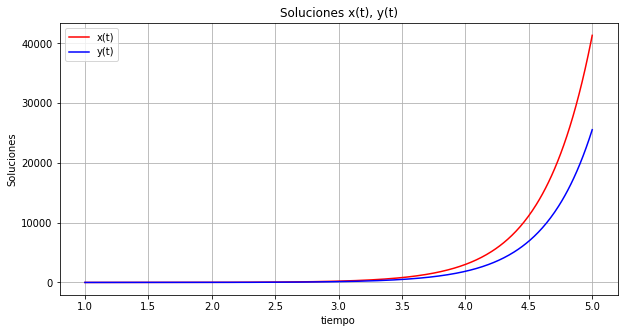

In [25]:
#Graficamos la solución
x, y = B.T

f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, x, 'r-', label='x(t)');
plt.plot(t, y  , 'b-', label='y(t)');
plt.grid();
#plt.ylim(0, 10)
plt.legend(loc='best');
plt.xlabel('tiempo');
plt.ylabel('Soluciones');
plt.title('Soluciones x(t), y(t)');
plt.show();

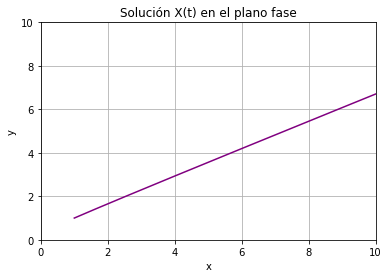

In [26]:
#Solución en el plano fase
plt.plot(x, y, 'purple')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.title('Solución X(t) en el plano fase')
plt.show()

#**Ejercicio 8**

In [27]:
#Definimos un vector V: V[0]=x, V[1]=y
#Definimos la Matriz A 

A8 = np.array([[0,3], [1,-2]])
print('A =', A8)

def f8(V, t=0):
    return np.array([ 3*V[1] ,
                  V[0]-2*V[1]])
    
#Los puntos críticos del sistema
V_crit8 = np.array([     0. ,  0.])

print('Punto crítico:', V_crit8)
print(' ')
#En los puntos críticos se anulan las derivadas. 
all(f8(V_crit8) == np.zeros(2) )
                                
#Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = linalg.eig(A8)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

A = [[ 0  3]
 [ 1 -2]]
Punto crítico: [0. 0.]
 
Eigenvalores: [ 1.+0.j -3.+0.j]
Eigenvectores: [[ 0.9486833  -0.70710678]
 [ 0.31622777  0.70710678]]


In [28]:
#Solución
#Los eigenvectores son linealmente independientes
lambda1 = eigvals[0]
lambda2 = eigvals[1]
print('Eigenvalores')
print('λ1= ', lambda1)
print('λ2= ', lambda2)
print(' ')
print('Eigenvectores')
v1 = eigvecs[:,0]
v2 = eigvecs[:,1]
print('v1=',v1)
print('v2=',v2)

Eigenvalores
λ1=  (1.0000000000000004+0j)
λ2=  (-3+0j)
 
Eigenvectores
v1= [0.9486833  0.31622777]
v2= [-0.70710678  0.70710678]


In [29]:
#Solución numérica. Integramos el sistema de ecuaciones de usando odeint
t = np.linspace(0, 5,  500)              # Rango de tiempo de integración
V0 = np.array([0, 3])                     # Condiciones iniciales x(1)=1, y(1)=1
B, infodict = integrate.odeint(f8, V0, t, full_output=True)
infodict['message']

'Integration successful.'

<Figure size 432x288 with 0 Axes>

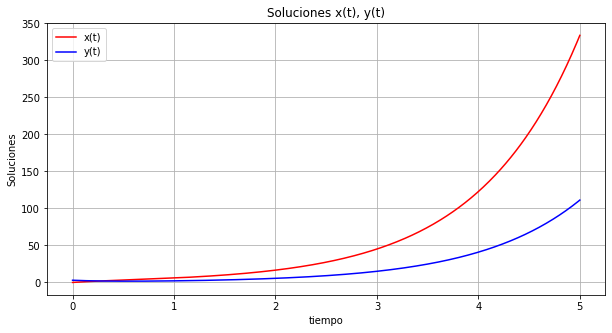

In [30]:
#Graficamos la solución
x, y = B.T

f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, x, 'r-', label='x(t)');
plt.plot(t, y  , 'b-', label='y(t)');
plt.grid();
#plt.ylim(0, 10)
plt.legend(loc='best');
plt.xlabel('tiempo');
plt.ylabel('Soluciones');
plt.title('Soluciones x(t), y(t)');
plt.show();

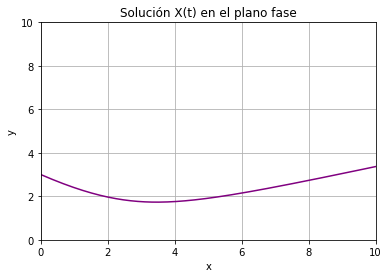

In [31]:
#Solución en el plano fase
plt.plot(x, y, 'purple')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.title('Solución X(t) en el plano fase')
plt.show()

#**Ejercicio 9**

In [32]:
#Definimos un vector V: V[0]=x, V[1]=y, V[2]=z
#Definimos la Matriz A 

A9 = np.array([[2,0,0], [0,-1,0],[0,2,-3]])
print('A =', A9)

def f9(V, t=0):
    return np.array([ 2*V[0] ,
                  -V[1],
                   2*V[1]-3*V[2]])
    
#Los puntos críticos del sistema
V_crit9 = np.array([     0. ,  0., 0.])

print('Punto crítico:', V_crit9)
print(' ')
#En los puntos críticos se anulan las derivadas. 
all(f9(V_crit9) == np.zeros(3) )
                                
#Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = linalg.eig(A9)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

A = [[ 2  0  0]
 [ 0 -1  0]
 [ 0  2 -3]]
Punto crítico: [0. 0. 0.]
 
Eigenvalores: [ 2.+0.j -3.+0.j -1.+0.j]
Eigenvectores: [[1.         0.         0.        ]
 [0.         0.         0.70710678]
 [0.         1.         0.70710678]]


In [33]:
#Solución
#Los eigenvectores son linealmente independientes
lambda1 = eigvals[0]
lambda2 = eigvals[1]
lambda3 = eigvals[2]
print('Eigenvalores')
print('λ1= ', lambda1)
print('λ2= ', lambda2)
print('λ3= ', lambda3)
print(' ')
print('Eigenvectores')
v1 = eigvecs[:,0]
v2 = eigvecs[:,1]
v3 = eigvecs[:,2]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Eigenvalores
λ1=  (2+0j)
λ2=  (-3+0j)
λ3=  (-1+0j)
 
Eigenvectores
v1= [1. 0. 0.]
v2= [0. 0. 1.]
v3= [0.         0.70710678 0.70710678]


In [34]:
#Solución numérica. Integramos el sistema de ecuaciones de usando odeint
#Definimos el valor de b para las condiciones iniciales
b = 5
t = np.linspace(0, 5,  500)              # Rango de tiempo de integración
V0 = np.array([0, -b, b])                     # Condiciones iniciales x(0)=(0,-b,b)
B, infodict = integrate.odeint(f9, V0, t, full_output=True)
infodict['message']

'Integration successful.'

<Figure size 432x288 with 0 Axes>

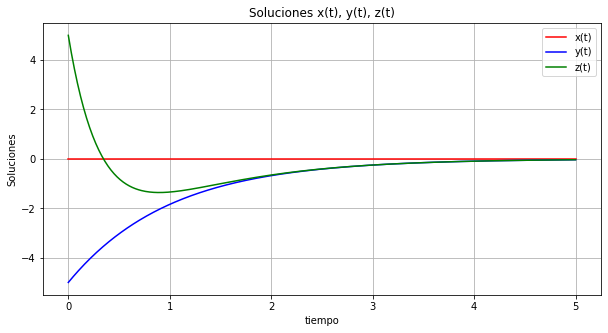

In [35]:
#Graficamos la solución
x, y, z = B.T

f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, x, 'r-', label='x(t)');
plt.plot(t, y  , 'b-', label='y(t)');
plt.plot(t, z  , 'g-', label='z(t)');
plt.grid();
#plt.ylim(0, 10)
plt.legend(loc='best');
plt.xlabel('tiempo');
plt.ylabel('Soluciones');
plt.title('Soluciones x(t), y(t), z(t)');
plt.show();

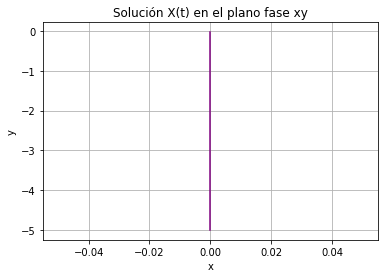

In [36]:
#Solución en el plano fase xy
plt.plot(x, y, 'purple')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
#plt.ylim(0, 10)
#plt.xlim(0, 10)
plt.title('Solución X(t) en el plano fase xy')
plt.show()

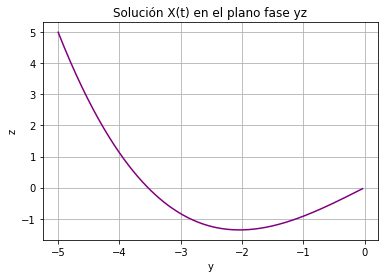

In [37]:
#Solución en el plano fase yz
plt.plot(y, z, 'purple')
plt.xlabel('y')
plt.ylabel('z')
plt.grid()
#plt.ylim(0, 10)
#plt.xlim(0, 10)
plt.title('Solución X(t) en el plano fase yz')
plt.show()

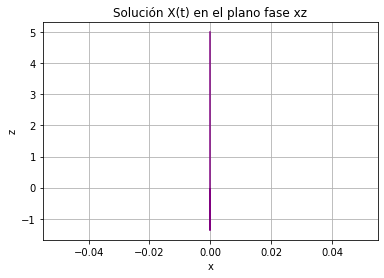

In [38]:
#Solución en el plano fase xz
plt.plot(x, z, 'purple')
plt.xlabel('x')
plt.ylabel('z')
plt.grid()
#plt.ylim(0, 10)
#plt.xlim(0, 10)
plt.title('Solución X(t) en el plano fase xz')
plt.show()

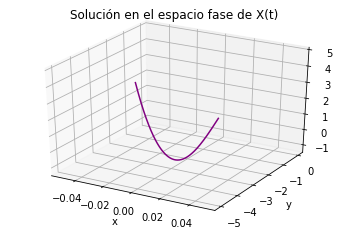

In [39]:
#Solución en el espacio fase  
fig = plt.figure()
ax = plt.axes(projection ='3d')

#plt.xlim(-10, 10)
#plt.ylim(-10, 10)

plt.xlabel('x');
plt.ylabel('y');
#plt.zlabel('z');

#Definimos los 3 ejes
x, y, z = B.T
  
# plotting
ax.plot3D(x, y, z, 'purple')
ax.set_title('Solución en el espacio fase de X(t)')
plt.show()

#**Ejercicio 10**

**10.1**


In [40]:
#Definimos los parámetros a utilizar para el problema
b1=b2=1
k1=6
k2=4
#Definimos la matriz A
A = np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,-b2]])
#Calculamos los eigenvalores de la matriz
lambda1, lambda2, lambda3, lambda4 = linalg.eigvals(A)
#Imprimimos los eigenvalores
print('Eigenvalores:')
print('λ1: ', lambda1)
print('λ2: ', lambda2)
print('λ3: ', lambda3)
print('λ4: ', lambda4)

Eigenvalores:
λ1:  (-0.5000000000000002+3.427827300200523j)
λ2:  (-0.5000000000000002-3.427827300200523j)
λ3:  (-0.5+1.3228756555322945j)
λ4:  (-0.5-1.3228756555322945j)



Vemos que tenemos eigenvalores de números complejos. Tenemos que los primeros dos eigenvalores son $\lambda_{1,2}=-0.5\pm3.4278i$, y los restantes son $\lambda_{1,2}=-0.5\pm1.3228i$. Entonces para los primeros dos eigenvalores se cumple que $a&lt;0&lt;b$ y para los últimos dos también.

De esto podemos concluir que tenemos dos focos o espirales estables.

**10.2**

In [41]:
#Definimos de nuevo los parámetros a utilizar para el problema para el caso sin fricción con condiciones iniciales
b1=b2=0
k1=6
k2=4
x0 = np.array([1,0,4,0])
#Definimos la matriz A
A = np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,-b2]])
#Calculamos los eigenvalores de la matriz
lambda1, lambda2, lambda3, lambda4 = linalg.eigvals(A)
#Imprimimos los eigenvalores
print('Eigenvalores:')
print('λ1: ', lambda1)
print('λ2: ', lambda2)
print('λ3: ', lambda3)
print('λ4: ', lambda4)

Eigenvalores:
λ1:  (-7.848128277522717e-18+3.4641016151377553j)
λ2:  (-7.848128277522717e-18-3.4641016151377553j)
λ3:  (3.5603703886533236e-17+1.4142135623730951j)
λ4:  (3.5603703886533236e-17-1.4142135623730951j)


En este caso tenemos un foco o espiral estable y un foco o espiral inestable.

In [42]:
#Definimos el sistema de ecuaciones en una función
def f10(x0, t, k1, k2, b1, b2):
  x1, x2, x3, x4 = x0
  dxdt=[x3, x4, -(k1+k2)*x1+k2*x2-b1*x3+k1-k2, k2*x1-k2*x2-b2*x4+k2]
  return dxdt

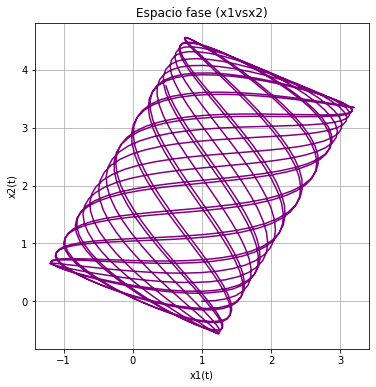

In [43]:
#Definimos las condiciones y las constantes a utilizar
#Utilizamos odeint para resolver con la condición inicial
t=np.linspace(0,50,1000)
X=odeint(f10,x0,t,args=(k1, k2, b1, b2))

# Graficamos el espacio fase
plt.figure(figsize=(6,6))
plt.plot(X[:,0],X[:,1],color='purple')
plt.title('Espacio fase (x1vsx2)')
plt.xlabel('x1(t)')
plt.ylabel('x2(t)')
plt.grid()
plt.show()

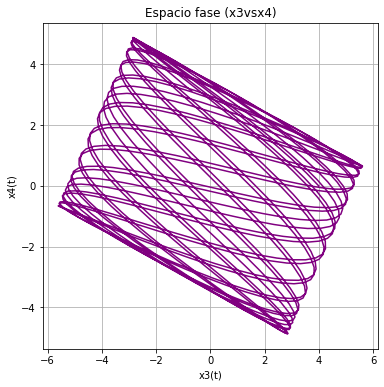

In [44]:
#Graficamos el espacio fase
plt.figure(figsize=(6,6))
plt.plot(X[:,2],X[:,3],color='purple')
plt.title('Espacio fase (x3vsx4)')
plt.xlabel('x3(t)')
plt.ylabel('x4(t)')
plt.grid()
plt.show()

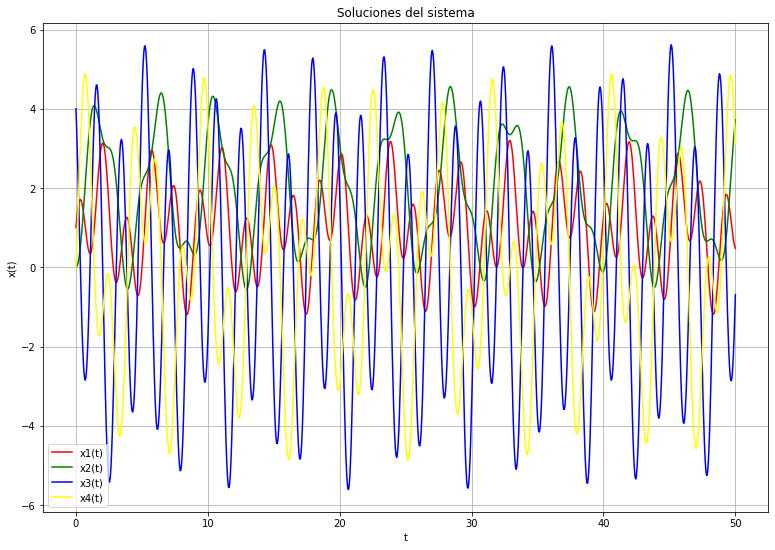

In [45]:
#Graficamos las soluciones del sistema
plt.figure(figsize=(13,9))
plt.plot(t,X[:,0],color='red',label='x1(t)')
plt.plot(t,X[:,1],color='green',label='x2(t)')
plt.plot(t,X[:,2],color='blue',label='x3(t)')
plt.plot(t,X[:,3],color='yellow',label='x4(t)')
plt.title('Soluciones del sistema')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='best')
plt.show()

**10.3**

In [46]:
#Definimos de nuevo los parámetros a utilizar para el problema para el caso sin fricción con condiciones iniciales
b1=0.1
b2=0.2
k1=6
k2=4
x0 = np.array([1,0,4,0])
#Definimos la matriz A
A = np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,-b2]])
#Calculamos los eigenvalores de la matriz
lambda1, lambda2, lambda3, lambda4 = linalg.eigvals(A)
#Imprimimos los eigenvalores
print('Eigenvalores:')
print('λ1: ', lambda1)
print('λ2: ', lambda2)
print('λ3: ', lambda3)
print('λ4: ', lambda4)

Eigenvalores:
λ1:  (-0.0599846540698995+3.463305356290167j)
λ2:  (-0.0599846540698995-3.463305356290167j)
λ3:  (-0.09001534593010038+1.411459149362342j)
λ4:  (-0.09001534593010038-1.411459149362342j)


Tenemos el mismo caso que en el primer inciso: focos estables.

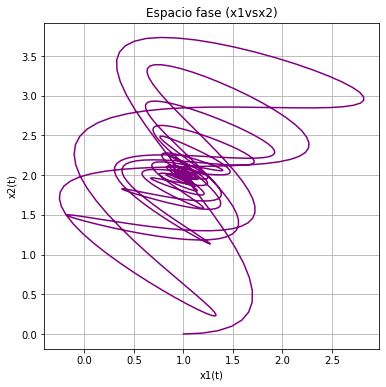

In [47]:
#Definimos las condiciones y las constantes a utilizar
#Utilizamos odeint para resolver con la condición inicial
t=np.linspace(0,50,1000)
X=odeint(f10,x0,t,args=(k1, k2, b1, b2))

# Graficamos el espacio fase
plt.figure(figsize=(6,6))
plt.plot(X[:,0],X[:,1],color='purple')
plt.title('Espacio fase (x1vsx2)')
plt.xlabel('x1(t)')
plt.ylabel('x2(t)')
plt.grid()
plt.show()

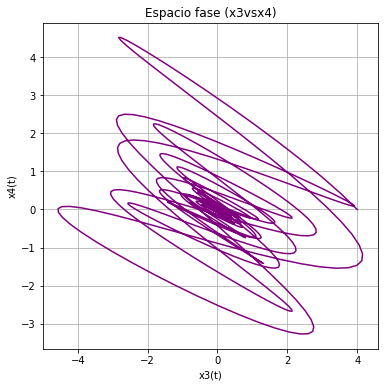

In [48]:
#Graficamos el espacio fase
plt.figure(figsize=(6,6))
plt.plot(X[:,2],X[:,3],color='purple')
plt.title('Espacio fase (x3vsx4)')
plt.xlabel('x3(t)')
plt.ylabel('x4(t)')
plt.grid()
plt.show()


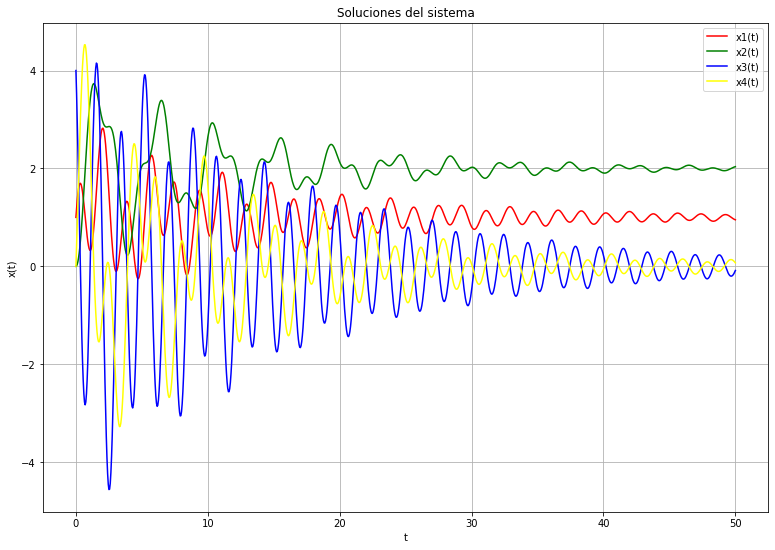

In [49]:
#Graficamos las soluciones del sistema
plt.figure(figsize=(13,9))
plt.plot(t,X[:,0],color='red',label='x1(t)')
plt.plot(t,X[:,1],color='green',label='x2(t)')
plt.plot(t,X[:,2],color='blue',label='x3(t)')
plt.plot(t,X[:,3],color='yellow',label='x4(t)')
plt.title('Soluciones del sistema')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='best')
plt.show()